# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [ ]:
#!pip install jupyter-cjk-xelatex
#!python -m spacy download es_core_news_sm



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
import gc #garbage collector

import nltk

In [ ]:
#data1=pd.read_json('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/Proyecto 3/dataset_es_dev.json',lines=True)
#data_train=pd.read_json('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/Proyecto 3/dataset_es_train.json',lines=True)
#data_test=pd.read_json('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/Proyecto 3/dataset_es_test.json',lines=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##Para colab
data1=pd.read_json('/content/drive/MyDrive/Colab Notebooks/proyecto 03/dataset_es_dev.json',lines=True)
data_train=pd.read_json('/content/drive/MyDrive/Colab Notebooks/proyecto 03/dataset_es_train.json',lines=True)
data_test=pd.read_json('/content/drive/MyDrive/Colab Notebooks/proyecto 03/dataset_es_test.json',lines=True)
print(data1.shape)
print(data_train.shape)
print(data_test.shape)

(5000, 8)
(200000, 8)
(5000, 8)


In [ ]:
data=pd.concat([data1,data_train,data_test])
data.shape

(210000, 8)

### Analisis Exploratorio

In [ ]:
data.shape

(210000, 8)

In [ ]:
for i in data:
    print(f'{i}  {data[i].unique().size}')

review_id  210000
product_id  156458
reviewer_id  187140
stars  5
review_body  208127
review_title  117156
language  1
product_category  30


**Solo exploraremos stars y product category**

Luego preprocesaremos con nltk los reviews y exploraremos las features creadas

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


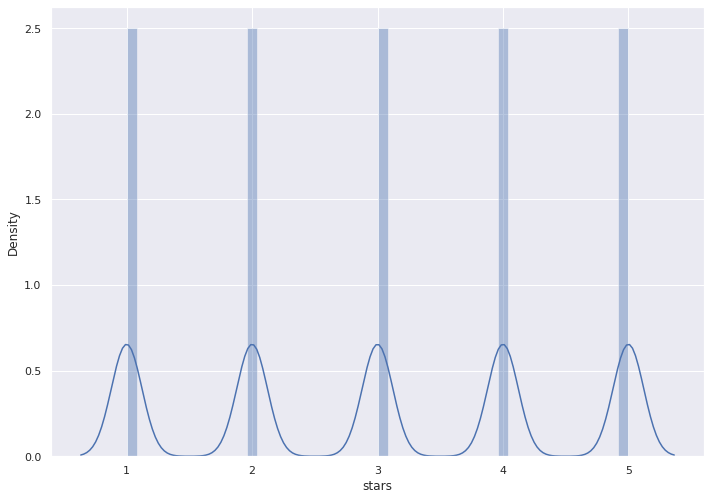

In [ ]:
sns.distplot(data.stars)

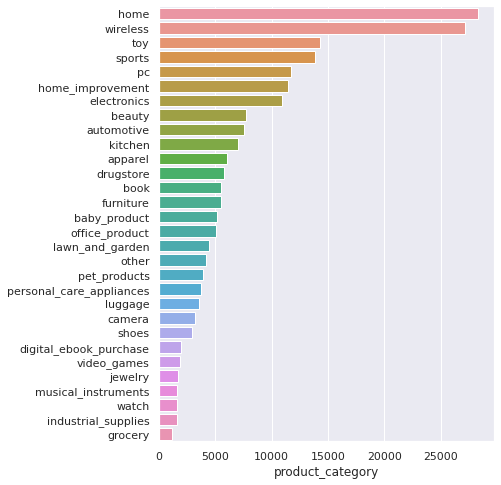

In [ ]:
plt.figure(figsize=[6,8])
sns.barplot(y=data.product_category.value_counts().index,x=data.product_category.value_counts())
plt.show()

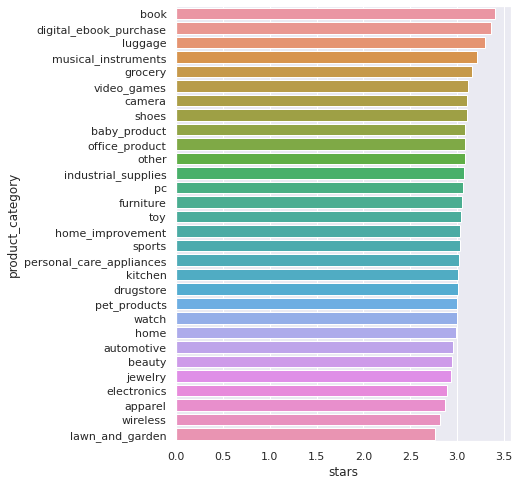

In [ ]:
plt.figure(figsize=[6,8])

sns.barplot(y=data.groupby('product_category').stars.mean().reset_index().sort_values(by='stars',ascending=False).product_category,x=data.groupby('product_category').stars.mean().reset_index().sort_values(by='stars',ascending=False).stars)

plt.show()

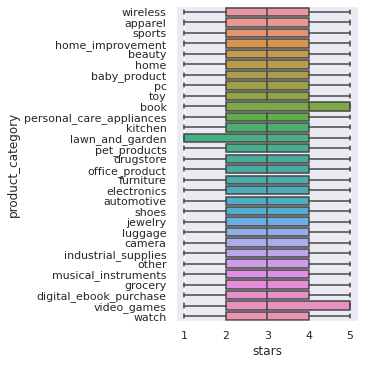

In [ ]:
sns.catplot(data=data,y='product_category',x='stars',kind='box')
plt.show()

### Preprocesamos y realizamos analisis exploratorio



In [ ]:
data1
data1.review_body

0       Malisimo, muy grande demasiado aparatoso y mal...
1               No he recibido el pedido no la devolución
2       Tengo que buscar otro sistema, este no funcion...
3       Utilicé las brocas de menor diámetro y se me d...
4              No me gusta su olor a viejo y aspecto malo
                              ...                        
4995    Me ha encantado la cesta. Ha llegado impecable...
4996                   Desempeña su función correctamente
4997    Me ha encantado la diadema! Las flores son tal...
4998    A mi me gustan mucho las fundas TPU, ya que so...
4999    El artículo ha cumplido con las expectativas q...
Name: review_body, Length: 5000, dtype: object

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')#.fileids()
print(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro'

#### Tokenizacion inicial para analisis exploratorio.
Utilizamos dataset unificado solo para este analisis

In [ ]:
from nltk.tokenize import RegexpTokenizer
import re 

d=data

#tokenizer = RegexpTokenizer('\s+', gaps=True)   ## \s separa por espacios
tokenizer = RegexpTokenizer('\w+|\$[\d\.]') ## \w  word character, +| alternation (or), \$[\d\.] marca un numero con decimal separado por . +|\S+ cualquier caracter que no es espacio en blanco
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')#.fileids()

reviews_1 = []
for i in tqdm(range(d.shape[0])):
    review = d.review_body.iloc[i] #seleccionar el review
    # Pasamos todo a minúsculas
    review=review.lower()
    
    #Tokenizamos
    review = tokenizer.tokenize(review) # Tokenizar con RegexpTokenizer
    
     # Eliminamos las palabras d emenos de 3 letras
    review = [palabra for palabra in review if len(palabra)>=3]
    # Filtrar por stopwords
    review = [palabra for palabra in review if palabra not in stopwords] 
    reviews_1.append(review) #agregar el resultado a la lista
#reviews_1

In [ ]:
import itertools
reviews_1 = list(itertools.chain(*reviews_1)) #sin el '*' no convierte todas las listas 
reviews_1[:10]

['malisimo',
 'grande',
 'demasiado',
 'aparatoso',
 'mal',
 'protector',
 'pantalla',
 'recibido',
 'pedido',
 'devolución']

In [ ]:
##Armamos matriz con FrequDist que es un countvectorizer de NLTK

freq_reviews_1 = nltk.FreqDist(reviews_1)
freq_reviews_1 = pd.DataFrame.from_dict(freq_reviews_1, orient='index')
freq_reviews_1.columns = ['Frequency']
freq_reviews_1.index.name = 'Word'
freq_reviews_1.sort_values('Frequency',ascending=False,inplace=True)
freq_reviews_1.head(20) 


,Frequency
Word,
bien,54174
calidad,33526
producto,25869
precio,24154
buena,20402
bastante,13591
dos,11840
buen,11739
funciona,11597


¿Cuanto representan las 1000 palabras que mas aparecen?


In [ ]:
freq_reviews_1.iloc[:1000].Frequency.sum()


1788179

In [ ]:
print(f"Estas palabras aparecen unas {freq_reviews_1.iloc[:1000].Frequency.sum()} veces en el dataset preprocesado")

Estas palabras aparecen unas 1788179 veces en el dataset preprocesado


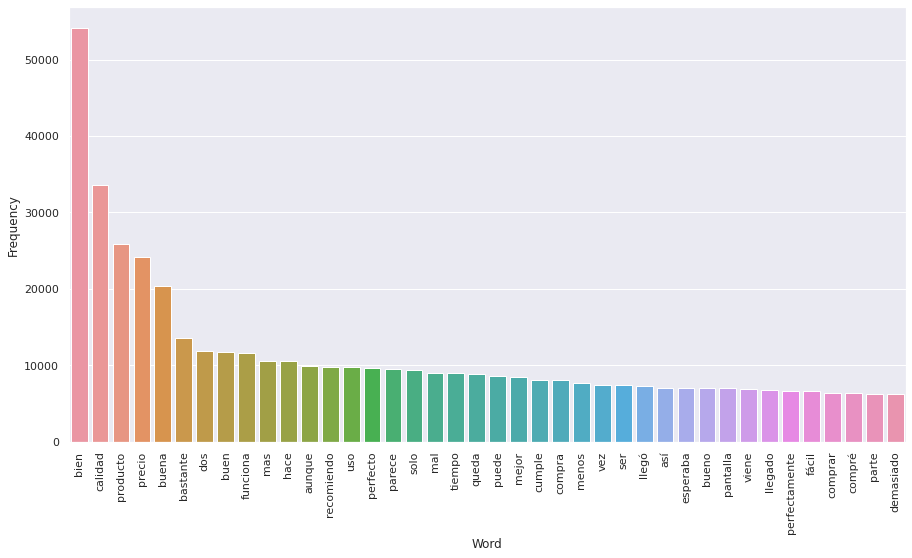

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = freq_reviews_1.iloc[:40].index, y = freq_reviews_1.iloc[:40].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [ ]:
diezx100_palabras=int(freq_reviews_1.shape[0]*0.1)
equisx100_frecuencia=freq_reviews_1.Frequency.iloc[:diezx100_palabras].sum()/freq_reviews_1.Frequency.sum()
print(f"El 10% de las palabras que son {diezx100_palabras} tienen una frecuencia del {equisx100_frecuencia*100}% del total")

El 10% de las palabras que son 5561 tienen una frecuencia del 89.3355356594944% del total


In [ ]:
freq_reviews_1=freq_reviews_1.reset_index()
freq_reviews_1['n']=np.arange(1,freq_reviews_1.shape[0]+1)
freq_reviews_1['Frequency_acc']=freq_reviews_1.Frequency.cumsum()
freq_reviews_1['Frequency_acc_porcentual']=(freq_reviews_1.Frequency_acc/freq_reviews_1.Frequency.sum())*100
freq_reviews_1['n_porcentual']=(freq_reviews_1.n/freq_reviews_1.n.iloc[-1])*100

freq_reviews_1.head()

,Word,Frequency,n,Frequency_acc,Frequency_acc_porcentual,n_porcentual
0,bien,54174,1,54174,1.990692,0.001798
1,calidad,33526,2,87700,3.222647,0.003596
2,producto,25869,3,113569,4.173237,0.005394
3,precio,24154,4,137723,5.060806,0.007192
4,buena,20402,5,158125,5.810503,0.008990


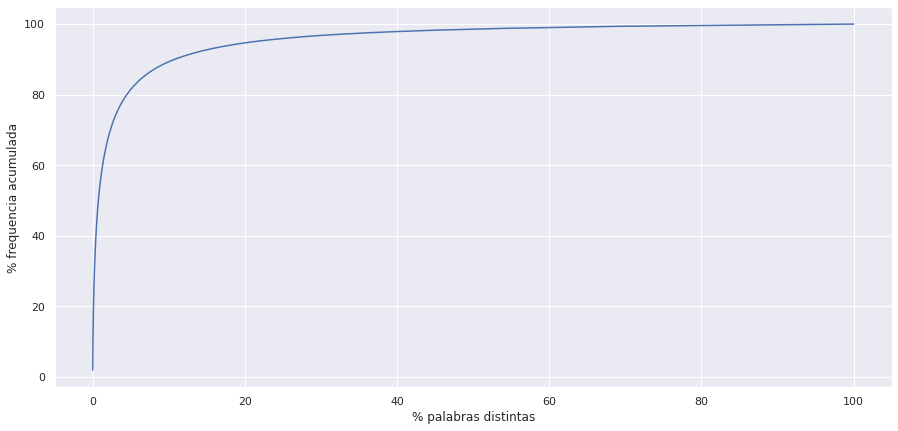

In [ ]:
plt.figure(figsize=[15,7])
plt.plot(freq_reviews_1['n_porcentual'].values,freq_reviews_1.Frequency_acc_porcentual)
plt.xlabel('% palabras distintas')
plt.ylabel('% frequencia acumulada')
plt.show()

Podemos ver que muy pocas palabras son las que mas aparecen en el dataset

### Ahora hacemos el preprocesamiento con lemmatizer que es lo que utilizaremos en el dataset para machine learning

## CON SPACY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
import gc #garbage collector

from tqdm import tqdm
import nltk

In [ ]:
#data1=pd.read_json('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/Proyecto 3/dataset_es_dev.json',lines=True)
#data_train=pd.read_json('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/Proyecto 3/dataset_es_train.json',lines=True)
#data_test=pd.read_json('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/Proyecto 3/dataset_es_test.json',lines=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Para colab
data1=pd.read_json('/content/drive/MyDrive/Colab Notebooks/proyecto 03/dataset_es_dev.json',lines=True)
data_train=pd.read_json('/content/drive/MyDrive/Colab Notebooks/proyecto 03/dataset_es_train.json',lines=True)
data_test=pd.read_json('/content/drive/MyDrive/Colab Notebooks/proyecto 03/dataset_es_test.json',lines=True)
print(data1.shape)
print(data_train.shape)
print(data_test.shape)

(5000, 8)
(200000, 8)
(5000, 8)


In [ ]:
  data=pd.concat([data1,data_train,data_test])

In [ ]:
#!pip install --upgrade spacy
#!pip show spacy
#!python -m spacy download es_core_news_sm #3.0.0--direct

#!python -m spacy info es_core_news_sm --markdown
#!python -m spacy validate
import spacy
nlp = spacy.load('es_core_news_sm')

In [ ]:
#!python -m spacy init fill-config base_config.cfg config.cfg --diff

In [ ]:
df=data[['review_body','review_title','product_category','stars']]

Realizamos la Lemmatizacion con Spacy

In [ ]:
def normalize(text):
    review=text.lower() # Pasamos a minusculas
    doc = nlp(text)
    doc.vector_
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop] #elimina signos de puntuacion
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and t.isalpha()] #borra palabras menores a 3 letras
    return lexical_tokens

In [ ]:
lemmatizer = nlp.get_pipe("lemmatizer")
print(lemmatizer.mode)


rule


In [ ]:
from tqdm import tqdm
reviews_lemmatized=[]
for review in tqdm(df.review_body):
  #print(review)
  ### Normalizamos con funcion definida
  review=normalize(review)
  review=" ".join(review)
  review=nlp(review)
  #print(review)
  ### Lemmatizamos con Spacy
  review_lemm=[lemmatizer.rule_lemmatize(r) for r in review]
  ### Unificamos ya que estaba en lista
  
  review_lemm=" ".join([r[0] for r in review_lemm])

  reviews_lemmatized.append(review_lemm)
df.loc[:,'review_body_lemm']=reviews_lemmatized


100%|██████████| 210000/210000 [1:05:20<00:00, 53.57it/s]
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
reviews_tok=[]
for text in tqdm(df.review_body_lemm):
  text=nlp(text)
  text= [t for t in text]
  reviews_tok.append(text)
df['rb_lem_tok']=reviews_tok

100%|██████████| 210000/210000 [27:30<00:00, 127.21it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Hacemos lo mismo para review_title

In [ ]:
from tqdm import tqdm
titles_lemmatized=[]
for review in tqdm(df.review_title):
  #print(review)
  ### Normalizamos con funcion definida
  review=normalize(review)
  review=" ".join(review)
  review=nlp(review)
  #print(review)
  ### Lemmatizamos con Spacy
  review_lemm=[lemmatizer.rule_lemmatize(r) for r in review]
  ### Unificamos ya que estaba en lista
  
  review_lemm=" ".join([r[0] for r in review_lemm])

  titles_lemmatized.append(review_lemm)
print(titles_lemmatized)
df['review_title_lemm']=titles_lemmatized

In [ ]:
titles_tok=[]
for text in tqdm(df.review_title_lemm):
  text=nlp(text)
  text= [t for t in text]
  titles_tok.append(text)
df['rt_lem_tok']=titles_tok

100%|██████████| 210000/210000 [21:25<00:00, 163.31it/s]


## Checkpoint
Busco guardar df en un documento para hacer el analisis siguiente sobre el mismo (vectorizar analisis descriptivo y predictivo)

Reducimos la fila a lo justo y necesario y le cambiamos el tipo desde doc de spacy a str.
Luego lo guardamos como pickle

In [ ]:
df_save_2=df[["stars","review_body_lemm","review_title_lemm","product_category"]].copy()
df_save_2=df_save.astype({"stars":np.int64,"review_body_lemm":str,"review_title_lemm":str,"product_category":str})

In [ ]:
df_save_2.to_pickle('/content/drive/MyDrive/Colab Notebooks/proyecto 03/datos procesados final4.pkl')

Intento guardar el dataset entero como pickle

In [ ]:
df.reset_index(drop=True,inplace=True)

df.astype(str).to_json('/content/drive/MyDrive/Colab Notebooks/proyecto 03/datos procesados completo.json')

## Ya tenemos Dataset Preprocesado: 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
import gc #garbage collector

from tqdm import tqdm
import nltk

Dataframe completo con formato str

In [ ]:
#data_model=pd.read_json('/content/drive/MyDrive/Colab Notebooks/proyecto 03/datos procesados completo.json')

dataframe solo con columnas: stars, body lemm, title lemm y categories, todo con formato str


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_model=pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/proyecto 03/datos procesados final4.pkl")
df_model

,stars,review_body_lemm,review_title_lemm,product_category
0,1,malisimo grande aparatoso protector pantalla,malo compra,wireless
1,1,recibido pedido devolución,recibido,apparel
2,1,buscar sistema funcionar abrazadera agarrar ma...,aprieta manillar,sports
3,1,utilicé broca menor diámetro doblar ser manteq...,broca mantequillar,home_improvement
4,1,gustar olor viejo aspecto malo,gustar,beauty
...,...,...,...,...
209995,5,costar perfecto cumplir función sobrar peque c...,perfecto servir,wireless
209996,5,material flexible cómodo acorde descripción,vendedor rápido fiable,wireless
209997,5,grabado,medalla bonito grabado,home
209998,5,comprar bici finalmente quedado xiaomi scooter...,timbre,sports


### Armamos vectores count_vectorizer con sklearn

Lo usamos para analisis exploratorio por ahora

In [ ]:
list_reviews=df_model.review_body_lemm.values
list_titulos=df_model.review_title_lemm.values
stars=df_model.stars.values
category=df_model.product_category.values

In [ ]:
### PARA REVIEWS
## POR AHORA SOLO USAMOS ESTE PARA ANALISIS EXPLORATORIO
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores. Con mas de mil se me satura la RAM.
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features, ngram_range=(1, 2))#,stop_words="español")

#FIT TRANSFORM
reviews_count=cou_vec.fit_transform(list_reviews)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

#Creamos Dataframe
df_reviews_count=pd.DataFrame(data=reviews_count.toarray(),columns=all_words)
df_reviews_count["stars"]=stars
df_reviews_count["product_category"]=category


gc.collect()

4016

Hacemos analisis exploratorio 

*Solo utilizamos count vectorizer para esto*

¿Cuales son las palabras o conjunto de palabras que mas salieron?

In [ ]:
frequency_gral=df_reviews_count.drop(columns=["stars","product_category"]).sum(axis=0)
frequency_gral=frequency_gral.reset_index()
frequency_gral.columns=["word","frequency"]
frequency_gral.sort_values(by="frequency",ascending=False,inplace=True)

¿Con cuantas palabras estamos trabajando?
¿Cuantas veces en total aparecen estas 1000 palabras?

In [ ]:
print(f"Tenemos {frequency_gral.shape[0]} palabras")
print(f"Estas palabras aparecen unas {frequency_gral.frequency.sum()} veces en el dataset preprocesado vs 1788179 veces en el dataset inicial")

Tenemos 1000 palabras
Estas palabras aparecen unas 1552922 veces en el dataset preprocesado vs 1788179 veces en el dataset inicial


Creamos misma curva que analisis exploratorio inicial

In [ ]:
frequency_gral_1=frequency_gral.reset_index()
frequency_gral_1['n']=np.arange(1,frequency_gral_1.shape[0]+1)
frequency_gral_1['Frequency_acc']=frequency_gral_1.frequency.cumsum()
frequency_gral_1['Frequency_acc_porcentual']=(frequency_gral_1.Frequency_acc/frequency_gral_1.frequency.sum())*100
frequency_gral_1['n_porcentual']=(frequency_gral_1.n/frequency_gral_1.n.iloc[-1])*100

frequency_gral_1.head()

,index,word,frequency,n,Frequency_acc,Frequency_acc_porcentual,n_porcentual
0,996,él,38415,1,38415,2.473724,0.1
1,116,calidad,32323,2,70738,4.555155,0.2
2,742,producto,27349,3,98087,6.316286,0.3
3,724,precio,23048,4,121135,7.800456,0.4
4,183,comprar,18135,5,139270,8.968255,0.5


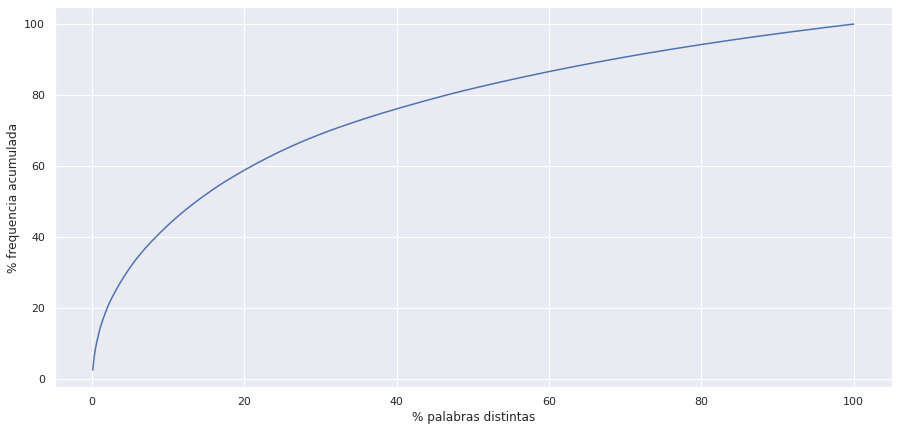

In [ ]:
plt.figure(figsize=[15,7])
plt.plot(frequency_gral_1['n_porcentual'].values,frequency_gral_1.Frequency_acc_porcentual)
plt.xlabel('% palabras distintas')
plt.ylabel('% frequencia acumulada')
plt.show()

Podemos ver que a diferencia de antes de preprocesar las palabras la frecuencia acumulada por palabra no esta tan concentrada en pocas palabras sino que se reparte relativamente mas cercano a una funcion lineal

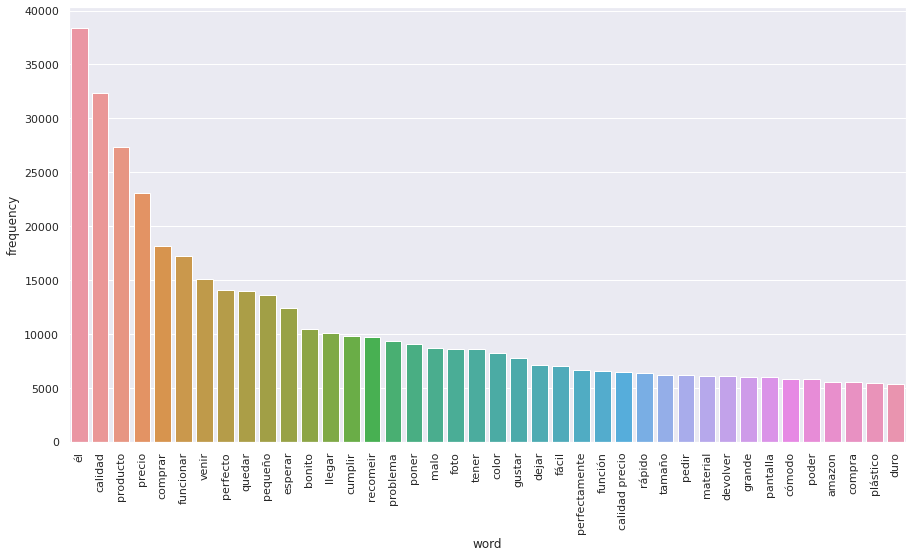

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = frequency_gral.iloc[:40].word, y = frequency_gral.iloc[:40].frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Quedo la palabra *él* porque el lemmatizer no proceso las palabras con acento

Cuales son las palabras mas usadas por estrella

  0%|          | 0/5 [00:00<?, ?it/s]

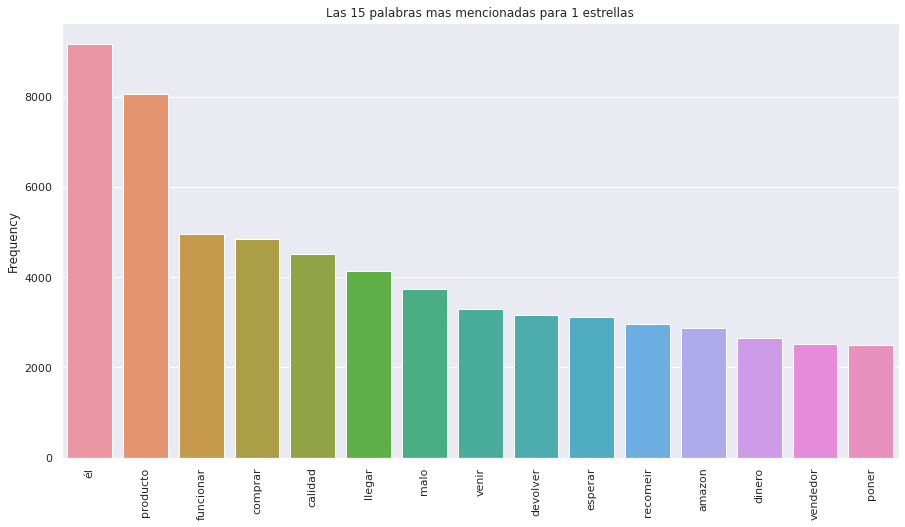

 20%|██        | 1/5 [00:00<00:02,  1.39it/s]

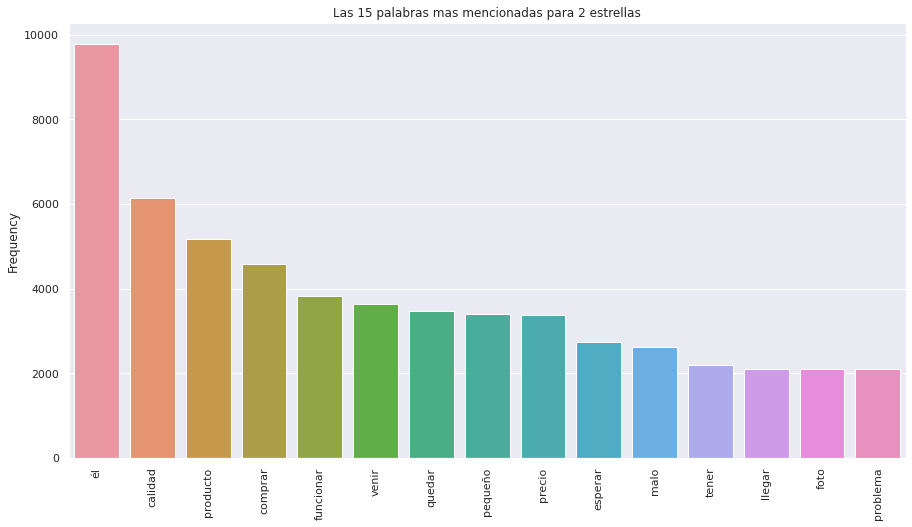

 40%|████      | 2/5 [00:01<00:02,  1.42it/s]

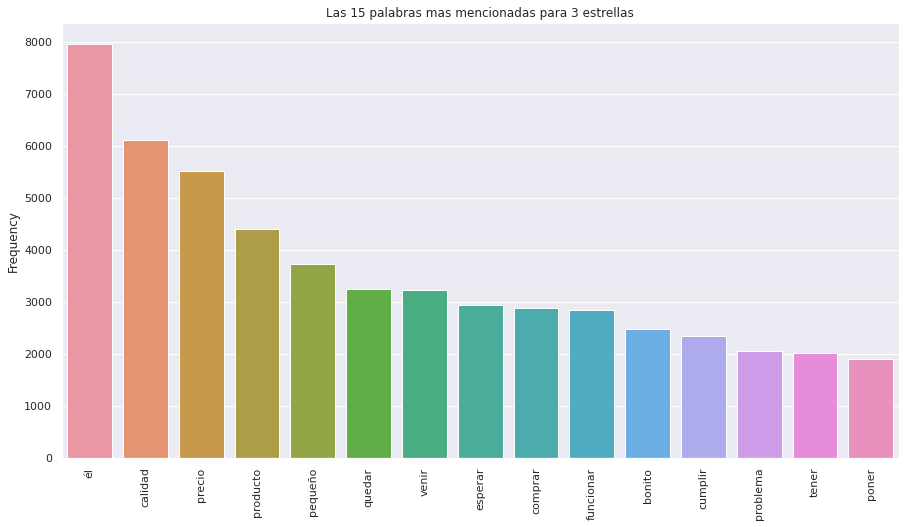

 60%|██████    | 3/5 [00:02<00:01,  1.42it/s]

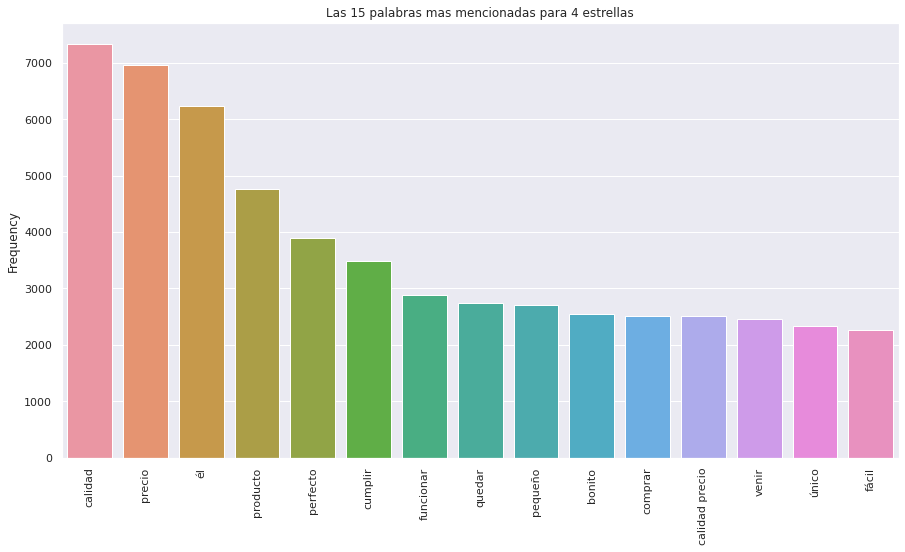

 80%|████████  | 4/5 [00:02<00:00,  1.42it/s]

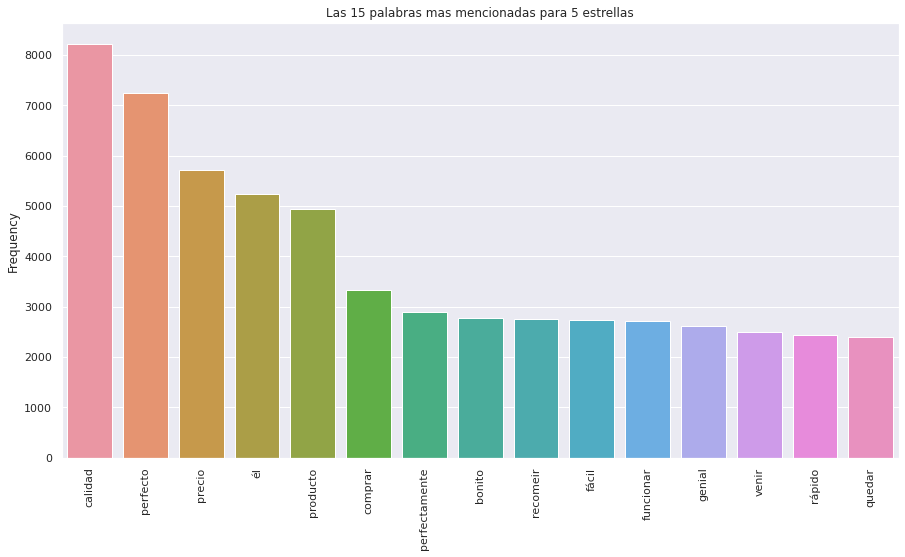

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


In [ ]:
for star in tqdm(df_reviews_count.stars.unique()):
  words_star=pd.DataFrame(df_reviews_count.loc[stars==star].drop(columns=["stars","product_category"]).transpose().sum(axis=1)).sort_values(by=0,ascending=False).iloc[:15]
  plt.figure(figsize = (15,8))
  plt.title(f"Las 15 palabras mas mencionadas para {star} estrellas")
  plot = sns.barplot(data=words_star,x=words_star.index,y=words_star[0])
  plt.ylabel("Frequency")
  for item in plot.get_xticklabels():
    item.set_rotation(90)

  plt.show()

¿Cuales son las palabras mas utilizadas para las distintas product_category?
Hacemos lo mismo para las 8 product_category mas importantes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


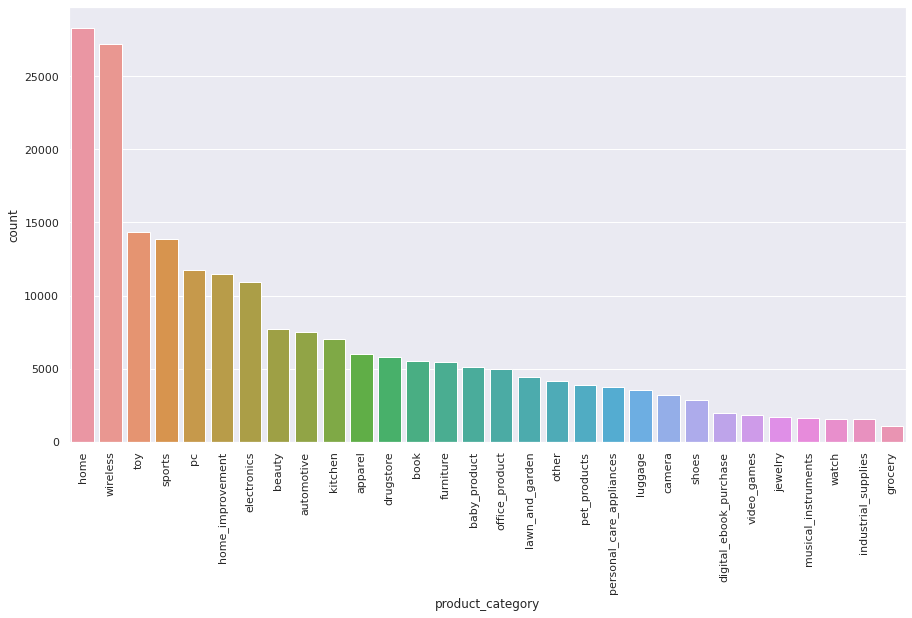

Index(['home', 'wireless', 'toy', 'sports', 'pc', 'home_improvement',
       'electronics', 'beauty'],
      dtype='object')


In [ ]:
plt.figure(figsize = (15,8))
plot =sns.countplot(df_reviews_count.product_category,order=df_reviews_count.product_category.value_counts().index) 
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()
print(df_reviews_count.product_category.value_counts()[:8].index)

  0%|          | 0/8 [00:00<?, ?it/s]

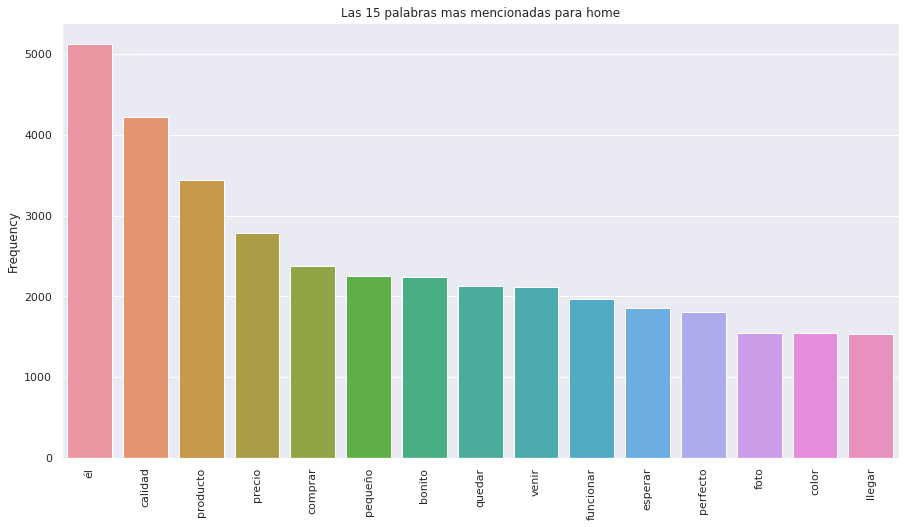

 12%|█▎        | 1/8 [00:00<00:04,  1.41it/s]

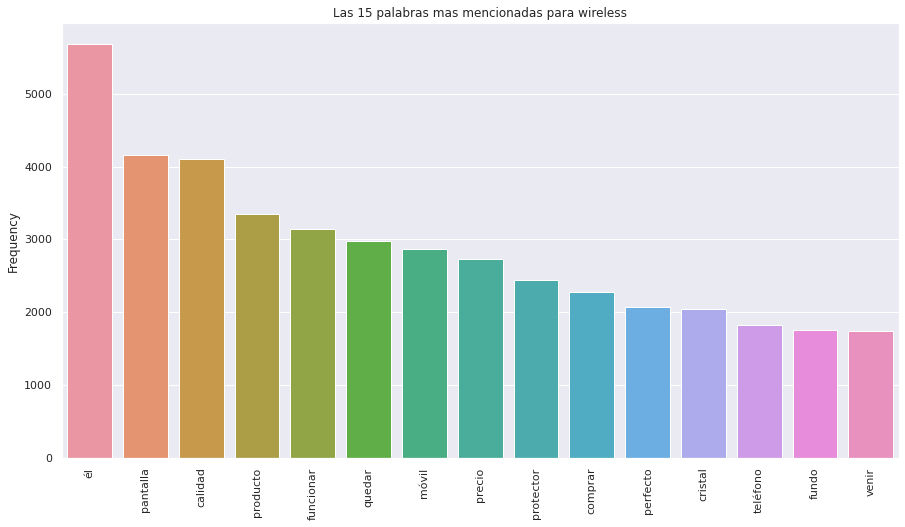

 25%|██▌       | 2/8 [00:01<00:04,  1.42it/s]

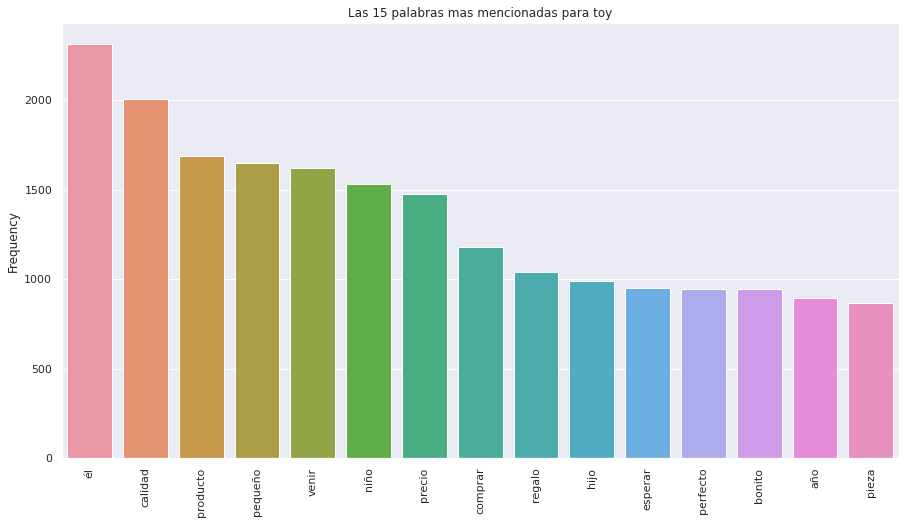

 38%|███▊      | 3/8 [00:02<00:03,  1.30it/s]

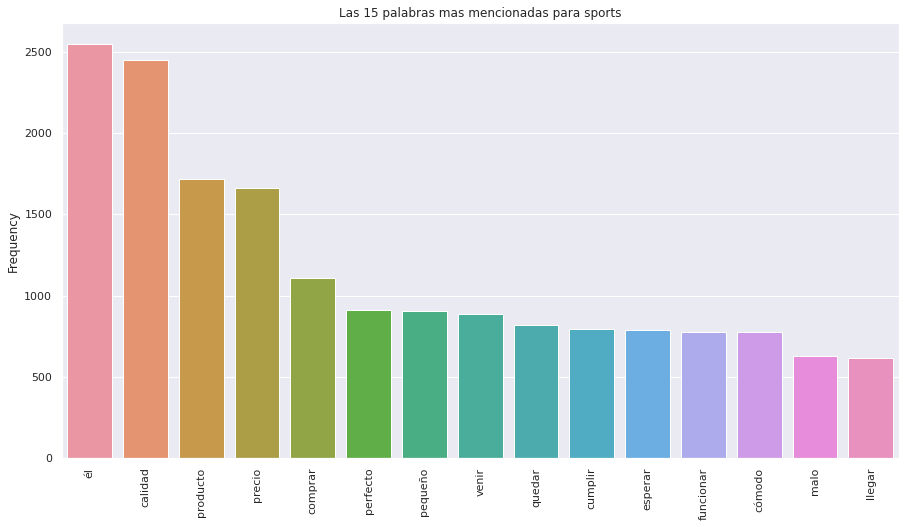

 50%|█████     | 4/8 [00:02<00:02,  1.42it/s]

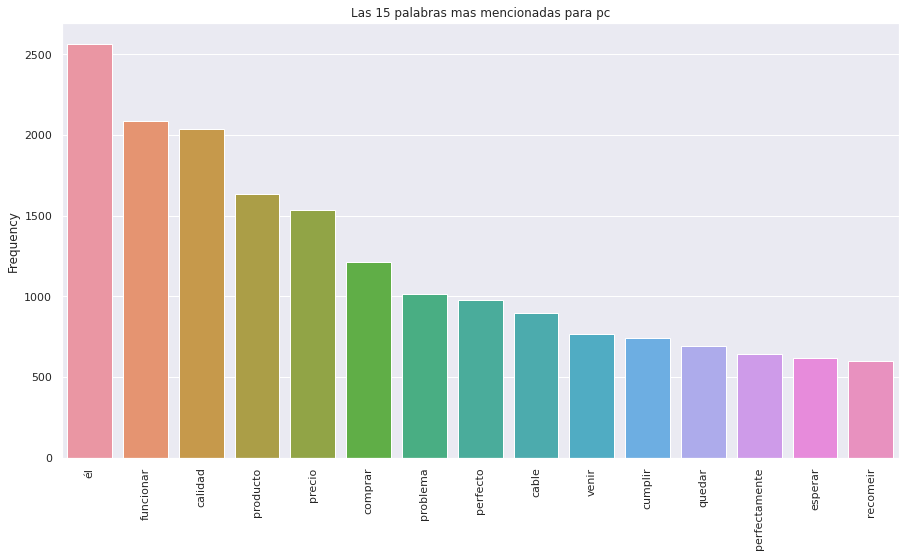

 62%|██████▎   | 5/8 [00:03<00:01,  1.52it/s]

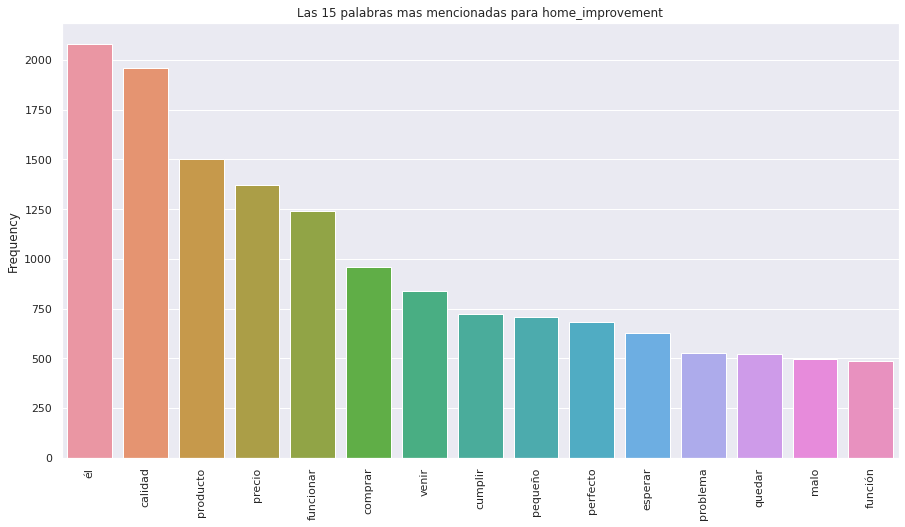

 75%|███████▌  | 6/8 [00:03<00:01,  1.61it/s]

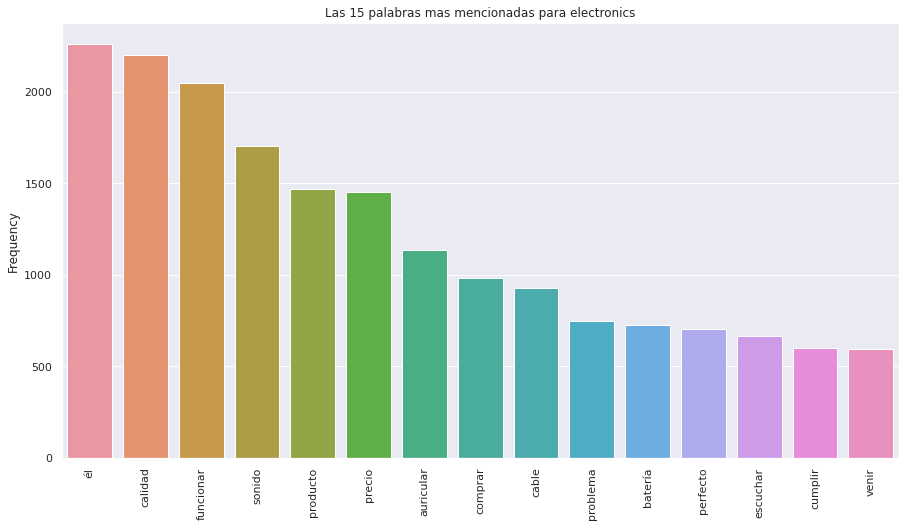

 88%|████████▊ | 7/8 [00:04<00:00,  1.67it/s]

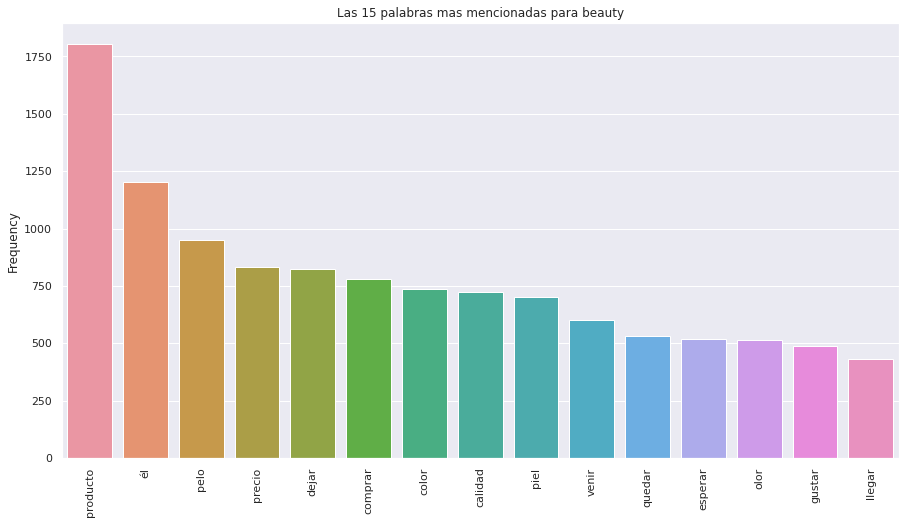

100%|██████████| 8/8 [00:04<00:00,  1.60it/s]


In [ ]:
categories=['home', 'wireless', 'toy', 'sports', 'pc', 'home_improvement',
       'electronics', 'beauty']
for category in tqdm(categories):
  var=pd.DataFrame(df_reviews_count.loc[df_reviews_count.product_category==category].drop(columns=["stars","product_category"]).transpose().sum(axis=1)).sort_values(by=0,ascending=False).iloc[:15]
  plt.figure(figsize = (15,8))
  plt.title(f"Las 15 palabras mas mencionadas para {category}")
  plot = sns.barplot(data=var,x=var.index,y=var[0])
  plt.ylabel("Frequency")
  for item in plot.get_xticklabels():
    item.set_rotation(90)

  plt.show()

Realizamos herramiento donde se inserta una palabra y figuran graficos por product category, por estrella y por ambos

Exploramos palabras co mo precio, color o rueda para ver en que categorias importa mas.

ingrese palabra a analizar:deporte
 La palabra deporte aparece en  394  reviews


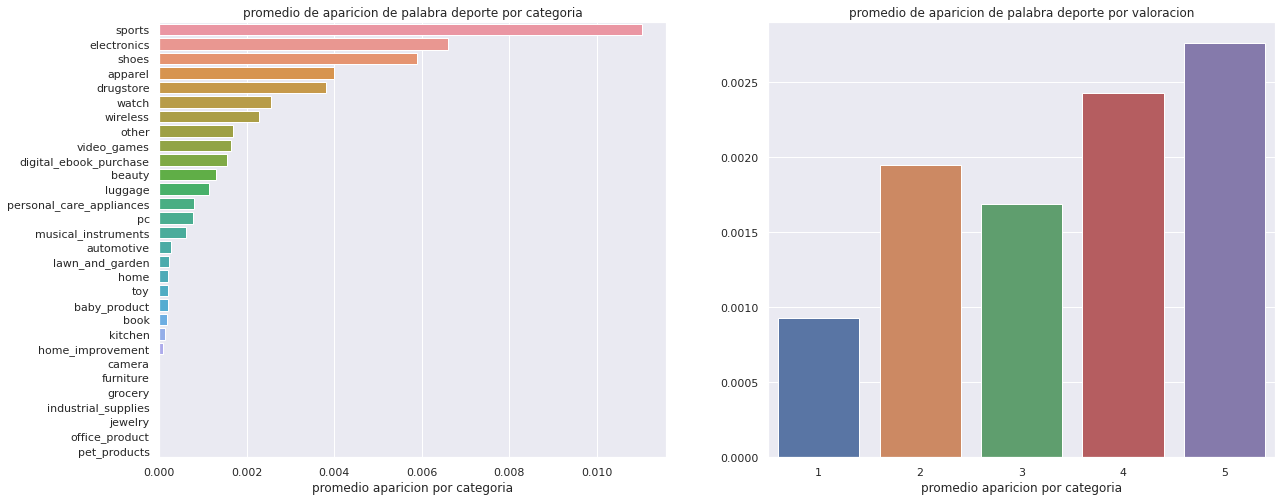

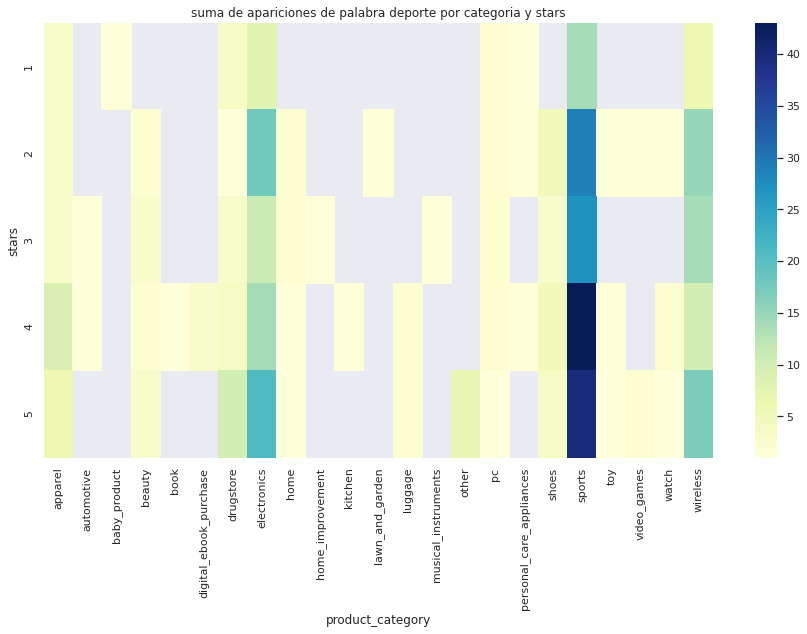

In [ ]:
palabra=input("ingrese palabra a analizar:")

# Armamos dataset para categories
sum_=df_reviews_count[df_reviews_count[palabra]>0][[palabra,"stars","product_category"]].groupby("product_category")[palabra].sum().sort_values(ascending=False)
count_category=df_reviews_count.product_category.value_counts()#.sort_values(sum_.index)
precio_prom_1=sum_.divide(count_category).sort_values(ascending=False)


# Armamos dataset para star
sum_stars=df_reviews_count[df_reviews_count[palabra]>0][[palabra,"stars","product_category"]].groupby("stars")[palabra].sum().sort_values(ascending=False)
count_stars=df_reviews_count.stars.value_counts()#.sort_values(sum_.index)
precio_prom=sum_stars.divide(count_stars)#.sort_values(ascending=False)

#Para Matriz
m_sum=df_reviews_count[df_reviews_count[palabra]>0][[palabra,"stars","product_category"]].groupby(["product_category","stars"])[palabra].sum().sort_values(ascending=False).reset_index()

matrix=pd.pivot_table(m_sum,index="stars",columns="product_category",values=palabra)


print(f" La palabra {palabra} aparece en  {df_reviews_count[df_reviews_count[palabra]>0].shape[0]}  reviews")
## GRAFICO 1
plt.figure(figsize=[20,8])

plt.subplot(121)
sns.barplot(y=precio_prom_1.index,x=precio_prom_1.values)
plt.title(f"promedio de aparicion de palabra {palabra} por categoria")
plt.xlabel("promedio aparicion por categoria")

## GRAFICO 2
plt.subplot(122)
sns.barplot(x=precio_prom.index,y=precio_prom.values)
plt.title(f"promedio de aparicion de palabra {palabra} por valoracion")
plt.xlabel("promedio aparicion por categoria")


plt.show()

# GRAFICO 3
plt.figure(figsize=[15,8])
plt.title(f"suma de apariciones de palabra {palabra} por categoria y stars")

sns.heatmap(matrix,cmap="YlGnBu",fmt="d")
plt.show()

## MODELOS PREDICTIVOS

Utilizaremos modelos de regresion para predecir cuantas estrellas: 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
import gc #garbage collector

from tqdm import tqdm
import nltk

dataframe solo con columnas: stars, body lemm, title lemm y categories, todo con formato str


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_model=pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/proyecto 03/datos procesados final4.pkl")
df_model

,stars,review_body_lemm,review_title_lemm,product_category
0,1,malisimo grande aparatoso protector pantalla,malo compra,wireless
1,1,recibido pedido devolución,recibido,apparel
2,1,buscar sistema funcionar abrazadera agarrar ma...,aprieta manillar,sports
3,1,utilicé broca menor diámetro doblar ser manteq...,broca mantequillar,home_improvement
4,1,gustar olor viejo aspecto malo,gustar,beauty
...,...,...,...,...
209995,5,costar perfecto cumplir función sobrar peque c...,perfecto servir,wireless
209996,5,material flexible cómodo acorde descripción,vendedor rápido fiable,wireless
209997,5,grabado,medalla bonito grabado,home
209998,5,comprar bici finalmente quedado xiaomi scooter...,timbre,sports


In [ ]:
df_model.review_body_lemm.values
df_model.stars.values

array([1, 1, 1, ..., 5, 5, 5])

### Armamos Pipelines

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_model.review_body_lemm.values, df_model.stars.values, test_size = 0.20, stratify=df_model.stars.values, random_state = 12)

Creamos Pipeline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import PCA 
from sklearn.linear_model import Ridge

vect = CountVectorizer()
tfidf = TfidfTransformer()
pca= PCA()
clf = Ridge()

from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()
tranformer=DenseTransformer()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

pipeline = Pipeline([('vect',vect),('tfidf',tfidf),("tranformer",tranformer),("pca",pca),('clf',clf)])

### Realizamos Random Search

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'tranformer', 'pca', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'clf__alpha', 'clf__copy_X', 'clf__fit_intercept', 'clf__max_iter', 'clf__normalize', 'clf__random_state', 'clf__solver', 'clf__tol'])

In [ ]:
param_grid={"vect__max_features":[750,1000],'vect__ngram_range':[(1,1),(1,2)],
            'pca__n_components':[300, 500, 700],
            'clf__alpha':[0.5,1,1.5,2,4]
            }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(pipeline, param_distributions=param_grid,cv=4,n_iter=15,n_jobs=-1,scoring="neg_root_mean_squared_error",verbose=10)
search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 53.4min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 57.0min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              CountVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.int64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                                              min_df=1,
                                                          

In [ ]:
print("Mejor Modelo: ", search.best_estimator_)
print("Mejor Score:  ",search.best_score_)
pd.DataFrame(search.cv_results_).sort_values(by="rank_test_score").iloc[:5]

Mejor Modelo:  Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=1000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('tranformer',
                 <__main__.DenseTransformer object at 0x7f78bc2cb190>),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=700,
                     random_state=None, svd_solver=

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vect__ngram_range,param_vect__max_features,param_pca__n_components,param_clf__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
14,211.606924,12.112999,4.388760,0.992545,"(1, 1)",1000,700,4,"{'vect__ngram_range': (1, 1), 'vect__max_featu...",-1.064189,-1.057029,-1.070348,-1.060439,-1.063001,0.004940,1
7,65.414783,0.499045,4.590936,0.065991,"(1, 2)",750,700,4,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",-1.068309,-1.063285,-1.076107,-1.066116,-1.068454,0.004764,2
4,65.631157,0.221172,4.505030,0.204120,"(1, 2)",750,700,1.5,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",-1.068314,-1.063324,-1.076223,-1.066111,-1.068493,0.004800,3
5,152.069606,2.172097,4.515888,0.083156,"(1, 2)",1000,500,1.5,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",-1.071885,-1.067966,-1.080962,-1.071795,-1.073152,0.004778,4
8,146.227748,5.902169,3.736248,0.206340,"(1, 1)",1000,500,1.5,"{'vect__ngram_range': (1, 1), 'vect__max_featu...",-1.075923,-1.068442,-1.081666,-1.072977,-1.074752,0.004799,5


In [ ]:
d=pd.DataFrame(search.cv_results_)
d.loc[d.rank_test_score == 1].params.values

array([{'vect__ngram_range': (1, 1), 'vect__max_features': 1000, 'pca__n_components': 700, 'clf__alpha': 4}],
      dtype=object)

Params Best Model Linear Regressor Ridge


{'vect__ngram_range': (1, 1), 'vect__max_features': 1000, 'pca__n_components': 700, 'clf__alpha': 4}

 Score=0.43705891419546794

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import PCA 
from sklearn.linear_model import Ridge

vect = CountVectorizer(max_features=1000,ngram_range=(1,1))
tfidf = TfidfTransformer()
pca= PCA(n_components=700)
clf = Ridge(alpha=4)

from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()
tranformer=DenseTransformer()


pipeline = Pipeline([('vect',vect),('tfidf',tfidf),("tranformer",tranformer),("pca",pca),('clf',clf)])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=1000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('tranformer',
                 <__main__.DenseTransformer object at 0x7f78bc291110>),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=700,
                     random_state=None, svd_solver='auto', tol=0.0

In [ ]:
from sklearn.metrics import mean_squared_error
y_test_pred=pipeline.predict(X_test)
y_train_pred=pipeline.predict(X_train)

print(f"RMSE Train:  {np.sqrt(mean_squared_error(y_train,y_train_pred))}")
print(f"RMSE Test:  {np.sqrt(mean_squared_error(y_test,y_test_pred))}")

RMSE Train:  1.0586704985667352
RMSE Test:  1.0650838901032966


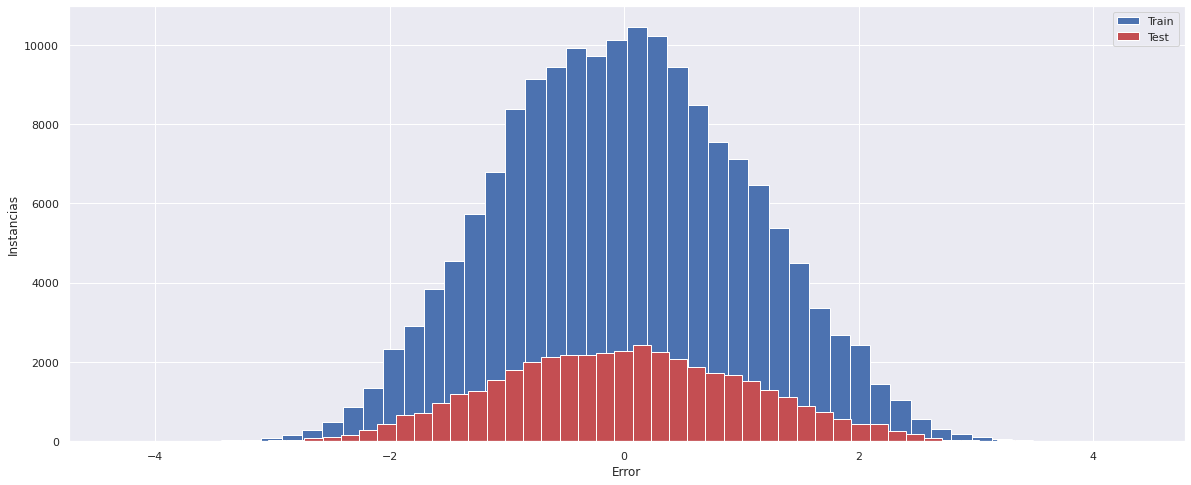

In [ ]:
## Grafico distribucion de errores de conjunto Train y conjunto Test
## Grafico distribucion de errores de conjunto Train y conjunto Test
plt.figure(figsize=[20,8])
#plt.subplot(2,1,1)  

plt.hist(y_train-y_train_pred,color="b",label="Train",bins=50)
plt.hist(y_test-y_test_pred,color="r",label="Test",bins=50)

plt.xlabel("Error")
plt.ylabel("Instancias")
plt.legend()

#plt.subplot(2,1,2)



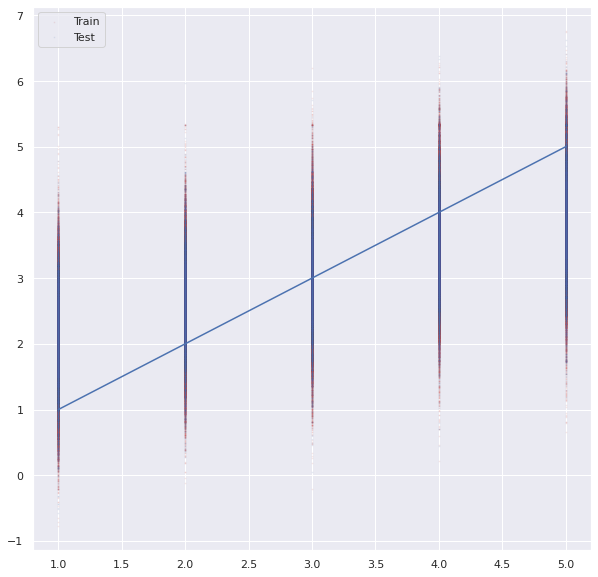

In [ ]:
plt.figure(figsize=[10,10])

plt.scatter(x=y_train,y=y_train_pred,alpha=0.1,label=("Train"),c="r",s=0.5)

plt.scatter(x=y_test,y=y_test_pred,alpha=0.1,label=("Test"),c="b",s=0.5)



plt.legend()

plt.plot(range(1,6),range(1,6))

plt.show()

### Con XGboost

In [ ]:
!pip3 install xgboost

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import PCA 
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

### DEFINO PIPELINE CON XGBOOST
pipeline_xgb = Pipeline([('vect',CountVectorizer(max_features=1000,ngram_range=(1,2))),
                      ('tfidf',TfidfTransformer()),
                      ("tranformer",tranformer),
                      ("pca",PCA(n_components=700)),
                      ('clf',xgb.XGBRegressor(max_depth=5,n_estimators=100,learning_rate=0.3,objective='reg:squarederror'))])

In [ ]:
pipeline_xgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=1000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.3,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=None, n_estima

In [ ]:
from sklearn.metrics import mean_squared_error
y_test_pred=pipeline_xgb.predict(X_test)
y_train_pred= pipeline_xgb.predict(X_train)

print(f"RMSE Train:  {np.sqrt(mean_squared_error(y_train,y_train_pred))}")
print(f"RMSE Test:  {np.sqrt(mean_squared_error(y_test,y_test_pred))}")

RMSE Train:  1.0058276747630053
RMSE Test:  1.073813399661005


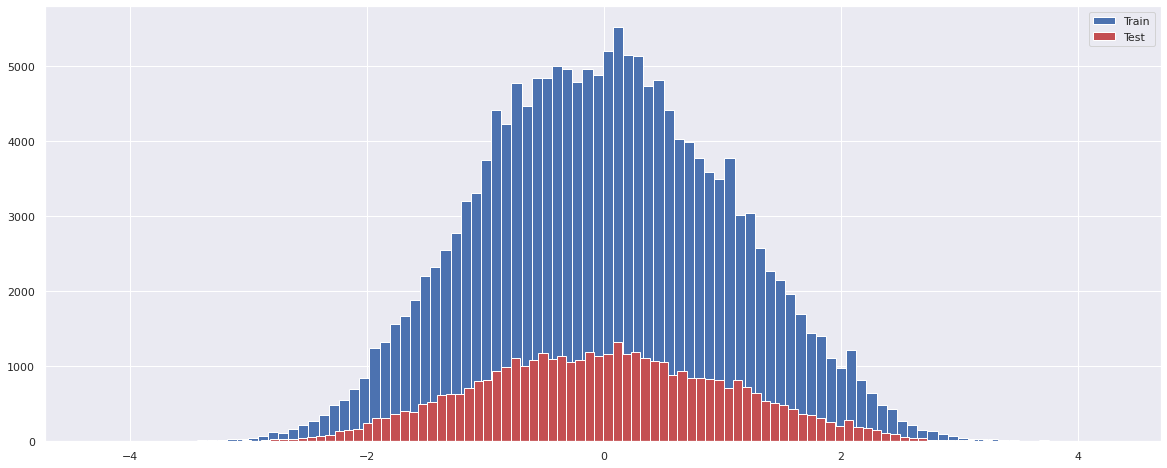

In [ ]:
## Grafico distribucion de errores de conjunto Train y conjunto Test
plt.figure(figsize=[20,8])
#plt.subplot(2,1,1)  

plt.hist(y_train-y_train_pred,color="b",label="Train",bins=50)
plt.hist(y_test-y_test_pred,color="r",label="Test",bins=50)


plt.legend()

#plt.subplot(2,1,2)


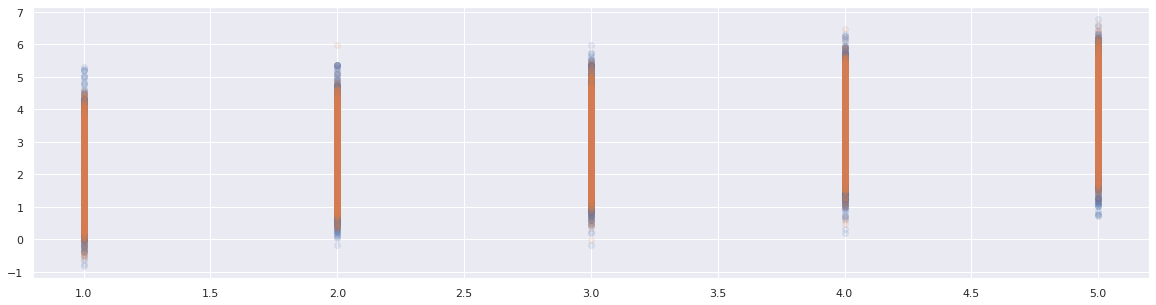

In [ ]:
plt.figure(figsize=[20,5])

plt.scatter(x=y_train,y=y_train_pred,alpha=0.03)
plt.scatter(x=y_test,y=y_test_pred,alpha=0.5)


Ridge
- RMSE Train:  1.0564834046163012
- RMSE Test:  1.0625286109202068

XGB: 
- RMSE Train:  1.0058276747630053
- RMSE Test:  1.073813399661005


El modelo de Regresión Lineal funciona con muy buena performance entonces elegiriamos ese modelo

## Bonus Track

Si divido en "buenas" y "malas" las criticas dependiendo de las estrellas:
- 1 , 2 o 3 estrellas -- "Mala" o 0
- 4 o 5 estrellas -- "Buena" o 1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
import gc #garbage collector

from tqdm import tqdm
import nltk

dataframe solo con columnas: stars, body lemm, title lemm y categories, todo con formato str


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_model=pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/proyecto 03/datos procesados final4.pkl")
df_model

,stars,review_body_lemm,review_title_lemm,product_category
0,1,malisimo grande aparatoso protector pantalla,malo compra,wireless
1,1,recibido pedido devolución,recibido,apparel
2,1,buscar sistema funcionar abrazadera agarrar ma...,aprieta manillar,sports
3,1,utilicé broca menor diámetro doblar ser manteq...,broca mantequillar,home_improvement
4,1,gustar olor viejo aspecto malo,gustar,beauty
...,...,...,...,...
209995,5,costar perfecto cumplir función sobrar peque c...,perfecto servir,wireless
209996,5,material flexible cómodo acorde descripción,vendedor rápido fiable,wireless
209997,5,grabado,medalla bonito grabado,home
209998,5,comprar bici finalmente quedado xiaomi scooter...,timbre,sports


In [ ]:
df_model["clasif"]=df_model.stars.map({1:0.0,2:0.0,3:0.0,4:1.0,5:1.0})

In [ ]:
df_model

,stars,review_body_lemm,review_title_lemm,product_category,clasif
0,1,malisimo grande aparatoso protector pantalla,malo compra,wireless,0.0
1,1,recibido pedido devolución,recibido,apparel,0.0
2,1,buscar sistema funcionar abrazadera agarrar ma...,aprieta manillar,sports,0.0
3,1,utilicé broca menor diámetro doblar ser manteq...,broca mantequillar,home_improvement,0.0
4,1,gustar olor viejo aspecto malo,gustar,beauty,0.0
...,...,...,...,...,...
209995,5,costar perfecto cumplir función sobrar peque c...,perfecto servir,wireless,1.0
209996,5,material flexible cómodo acorde descripción,vendedor rápido fiable,wireless,1.0
209997,5,grabado,medalla bonito grabado,home,1.0
209998,5,comprar bici finalmente quedado xiaomi scooter...,timbre,sports,1.0


In [ ]:
df_model.review_body_lemm.values
df_model.clasif.values

array([0., 0., 0., ..., 1., 1., 1.])

### Tunning del modelo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_model.review_body_lemm.values, df_model.clasif.values, test_size = 0.20, stratify=df_model.clasif.values, random_state = 12)

Creamos Pipeline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import PCA 
from sklearn.svm import LinearSVC

vect = CountVectorizer()
tfidf = TfidfTransformer()

clf = LinearSVC(dual=False)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

pipeline = Pipeline([('vect',vect),('tfidf',tfidf),('clf',clf)])

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__loss', 'clf__max_iter', 'clf__multi_class', 'clf__penalty', 'clf__random_state', 'clf__tol', 'clf__verbose'])

In [ ]:
param_grid={"vect__max_features":[750,1000,1500],'vect__ngram_range':[(1,1),(1,2)],
            'clf__C':[0.25,0.5,0.75,1,1.25,1.5,2,3,4],
            'clf__loss':["hinge", "squared_hinge"]
            }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(pipeline, param_distributions=param_grid,cv=4,n_iter=20,n_jobs=-1,verbose=10)
search.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.8min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              CountVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.int64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                                              min_df=1,
                                                          

In [ ]:
print(search.best_estimator_)
print("Mejor Score:  ",search.best_score_)
pd.DataFrame(search.cv_results_)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=1500, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=0.75, class_weight=None, dual=False,
                           fit_intercept=True, intercept_scaling=1,
                   

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vect__ngram_range,param_vect__max_features,param_clf__loss,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,12.801810,0.115417,1.638651,0.012372,"(1, 2)",1500,squared_hinge,2,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",0.794833,0.790357,0.793619,0.790095,0.792226,0.002048,2
1,4.221520,0.067779,0.927730,0.021656,"(1, 1)",1500,squared_hinge,1,"{'vect__ngram_range': (1, 1), 'vect__max_featu...",0.793786,0.789690,0.793595,0.789048,0.791530,0.002174,5
2,12.054597,0.068518,1.577148,0.005655,"(1, 2)",750,squared_hinge,0.25,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",0.783048,0.780619,0.784286,0.779571,0.781881,0.001876,12
3,10.995797,0.078951,0.000000,0.000000,"(1, 2)",1500,hinge,1,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",NaN,NaN,NaN,NaN,NaN,NaN,16
4,10.974202,0.068045,0.000000,0.000000,"(1, 2)",1000,hinge,1.25,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",NaN,NaN,NaN,NaN,NaN,NaN,15
5,11.113681,0.067959,0.000000,0.000000,"(1, 2)",1500,hinge,1.5,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",NaN,NaN,NaN,NaN,NaN,NaN,14
6,12.075133,0.090765,1.630180,0.041817,"(1, 2)",1000,squared_hinge,0.75,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",0.788762,0.783714,0.789024,0.783381,0.786220,0.002677,9
7,11.952460,0.143804,1.614306,0.038432,"(1, 2)",750,squared_hinge,1.25,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",0.782857,0.780690,0.784095,0.779452,0.781774,0.001811,13
8,3.695104,0.027268,0.884426,0.007697,"(1, 1)",750,squared_hinge,0.5,"{'vect__ngram_range': (1, 1), 'vect__max_featu...",0.783976,0.780976,0.785690,0.780143,0.782696,0.002241,10
9,12.410151,0.161044,1.606381,0.003133,"(1, 2)",1500,squared_hinge,0.75,"{'vect__ngram_range': (1, 2), 'vect__max_featu...",0.794667,0.790738,0.793595,0.790238,0.792310,0.001869,1


In [ ]:
d=pd.DataFrame(search.cv_results_)
d.loc[d.rank_test_score == 1].params.values

array([{'vect__ngram_range': (1, 2), 'vect__max_features': 1500, 'clf__loss': 'squared_hinge', 'clf__C': 0.75}],
      dtype=object)

array([{'vect__ngram_range': (1, 2), 'vect__max_features': 1500, 'clf__loss': 'squared_hinge', 'clf__C': 0.75}],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
y_test_pred=search.predict(X_test)
y_train_pred=search.predict(X_train)

print(f"Accuracy Train:  {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy Test:  {accuracy_score(y_test,y_test_pred)}")

Accuracy Train:  0.7979345238095238
Accuracy Test:  0.7906428571428571


Confusion matrix, without normalization
[[21769  3431]
 [ 5362 11438]]
Normalized confusion matrix
[[0.86384921 0.13615079]
 [0.31916667 0.68083333]]


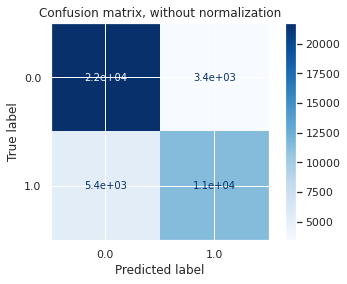

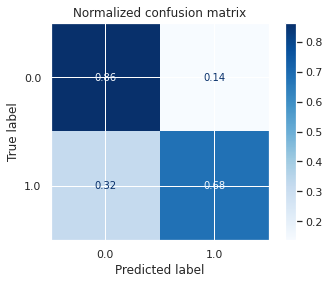

In [ ]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(search, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Podemos ver que el modelo suele tener más errores del tipo Falso Negativo o sea errores del tipo II.

